In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logomaker
import time
import glob
%matplotlib inline

# Import marginalization function
from utils import x_to_ct_df

# For drawing rectangles
from matplotlib.patches import Rectangle
pink = np.array([247, 198, 219])/256
purple = np.array([126, 66, 149])/256
red = np.array([228, 33, 63])/256

# Load figure style
plt.style.use('fig_style.txt')

6-7: ..
7-8: ..
8-9: ..
Execution time:6.65 sec.


<ipython-input-2-b3f3707e7b8d>:124: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


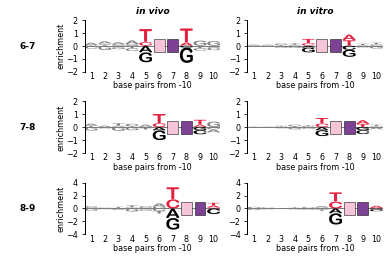

In [2]:
### Draw figure

# Set replicate
rep = 'rep2'
primer = 'NpN'

# Set figure font properties
from matplotlib.font_manager import FontProperties
figtext_font = FontProperties()
figtext_font.set_weight('semibold')
figtext_font.set_size('9')

# Rows index positions
poss = [6,7,8]
poss_labels = [f'{pos}-{pos+1}' for pos in poss]
nrows = len(poss)

# Concentrations to use
conc = 160
ncols = 2

# Set figsize
figsize=[5.3, 3.5]

# Create figure
fig = plt.figure(constrained_layout=True, figsize=figsize)
gs = fig.add_gridspec(nrows=nrows, ncols=ncols+1,
                      width_ratios=[.3,1,1],
                      left=.05, right=.99, bottom=.05, top=.90,
                      wspace=.2, hspace=.2)

# Draw logos within figure
t = time.time()

# Create dict of logo csv files
logo_files_dict = {}
for i, pos in enumerate(poss):
    logo_files_dict[(i,0)] = f'csv_logos/invivo_p{pos}_{primer}_{rep}_logo.csv'
    logo_files_dict[(i,1)] = f'csv_logos/invitro_p{pos}_{conc}uM_{rep}_logo.csv'

col_titles = ['in vivo', 'in vitro']
    
# Iterate over rows
for i, pos in enumerate(poss):

    # Print position for feedback
    pos_label = poss_labels[i]
    print(f'{pos_label}: ', end='')
    
    # Write position
    ax = fig.add_subplot(gs[i,0])
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax.text(x=.5, y=.5, s=pos_label, ha='center', va='center', 
            fontproperties=figtext_font)
    ax.axis('off')
    
    # Iterate over columns
    for j in [0,1]:
    
        # Provided feedback on progress
        print('.', end='')

        # Load logo
        logo_file = logo_files_dict[i,j]
        logo_df = pd.read_csv(logo_file, index_col=0)

        # Draw logo
        ax = fig.add_subplot(gs[i,j+1])
        logo = logomaker.Logo(df=logo_df,
                               ax=ax,
                               font_name='Arial Rounded MT Bold',
                               show_spines=False,
                               flip_below=False)
        ax.spines['left'].set_visible(True)

        # Color logo
        logo.style_glyphs(color=red)
        logo.style_glyphs_below(color='k')
        for c in 'ACGT':
            for k in range(1,11):
                if (k != pos-1) and (k != pos+2):
                    logo.style_single_glyph(c=c, p=k, color='gray')
                  
        # Style plot
        if i==0:
            ax.set_title(col_titles[j], style='italic', fontproperties=figtext_font)
        if i in [0,1]:
            yticks=[-2,-1,0,1,2]
            ylim=[-2,2]
            rect_height = 1
        elif i in [2]:
            yticks=[-4,-2,0,2,4]
            ylim=[-4,4]
            rect_height = 2  
        ax.set_yticks(yticks)
        ax.set_ylim(ylim)
        ax.set_xticks(range(1,11))
        if j==0:
            ax.set_ylabel('enrichment', labelpad=.5)
        ax.set_xlabel('base pairs from -10', labelpad=.5)
        ax.tick_params(axis='x', length=0, pad=0)
        
        # Gray out positions with zero entries
        for l in logo_df.index:
            if l not in [pos, pos+1]:
                if (logo_df==0).all(axis=1)[l]:
                    patch = Rectangle((l-.5, ylim[0]), 1, height, 
                                      facecolor='lightgray', edgecolor='lightgray')
                    ax.add_patch(patch)
        
        # Create rectangular patches
        rect_kwargs = {'linewidth':.5, 'edgecolor':'k'}
        ax.add_patch(Rectangle((pos-.4,-.5*rect_height), .8, rect_height, facecolor=pink, **rect_kwargs))
        ax.add_patch(Rectangle((pos+.6,-.5*rect_height), .8, rect_height, facecolor=purple, **rect_kwargs))

    # Feedback
    print('')
    
# Show execution time
print(f'Execution time:{time.time()-t:.2f} sec.')

# Tighten layout and save
fig.show()
fig.savefig(f'figures/fig_4_{rep}_logos.pdf')